## Introduction
People say RNN can solve the XOR problem, meaning there is a configuration of weight matrix that calculates the desired value given an input. But can RNN learn the XOR function from data?  

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Setting
Inputs: [1, 0], [1, 1], [0, 1], [0, 0]
One hidden layer with two hidden units. One output. 

In [2]:
def generateXORData(n):
    list = []
    target = []
    dict = {0: np.array([[0,0]]), 1: np.array([[0, 1]]), 2: np.array([[1,0]]), 3: np.array([[1,1]])}
    dict_target = {0: np.array([[0]]), 1: np.array([[1]]), 2: np.array([[1]]), 3: np.array([[0]])}
    for i in range(n):
        idx = np.random.randint(4)
        list.append(dict[idx])
        target.append(dict_target[idx])
    return list, target

Epoch: 0: loss: 0.247655
Epoch: 1: loss: 0.170642
Epoch: 2: loss: 0.022981
Epoch: 3: loss: 0.007162
Epoch: 4: loss: 0.004004
Epoch: 5: loss: 0.002646
Epoch: 6: loss: 0.001909
Epoch: 7: loss: 0.001455
Epoch: 8: loss: 0.001152
Epoch: 9: loss: 0.000938
Epoch: 10: loss: 0.000780
Epoch: 11: loss: 0.000659
Epoch: 12: loss: 0.000565
Epoch: 13: loss: 0.000490
Epoch: 14: loss: 0.000428
Epoch: 15: loss: 0.000378
Epoch: 16: loss: 0.000335
Epoch: 17: loss: 0.000300
Epoch: 18: loss: 0.000269
Epoch: 19: loss: 0.000243
BasicRNNCell/Linear/Matrix:0
[[ 4.8517561   4.94526243]
 [-4.46192932 -5.37289476]
 [ 0.52486151 -0.4099088 ]
 [ 0.27126914 -0.21353722]]
BasicRNNCell/Linear/Bias:0
[ 2.0335505  -2.26437902]
Variable:0
[[-4.35594225]
 [ 4.3223362 ]]
Variable_1:0
[ 4.04108715]


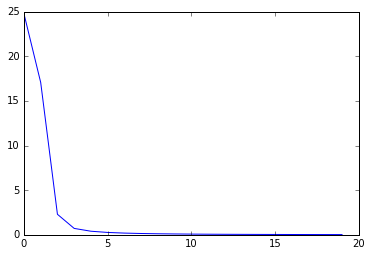

In [8]:
# This model uses RNN to solve XOR problem
with tf.Graph().as_default():
    batch_size = 1
    input = tf.placeholder(tf.float32, [batch_size, 2])
    target = tf.placeholder(tf.float32, [batch_size, 1])
    hidden_size = 2
    cell = tf.nn.rnn_cell.BasicRNNCell(hidden_size)
    state = cell.zero_state(batch_size, dtype=tf.float32)
    output, state = cell(input, state) 
    weight = tf.Variable(tf.zeros([2,1])) # actually [2, batch_size]
    bias = tf.Variable(tf.zeros([batch_size]))
    output = tf.nn.sigmoid(tf.matmul(output, weight) + bias)
    loss = tf.squeeze(tf.square(output - target))
    lr = 0.1
    # train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)
    train_op = tf.train.AdamOptimizer(lr).minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        n = 100 # training examples
        inputs, targets = generateXORData(n)
        max_epoch = 20
        cost_list = []
        for epoch in range(max_epoch):
            total_cost = 0
            for x,y in zip(inputs, targets):
                feed_dict = {input: x, target: y}
                _, cost = sess.run([train_op, loss], feed_dict=feed_dict)
                #print(cost)
                total_cost += cost
            
            print("Epoch: %d: loss: %f" % (epoch, total_cost / n))
            cost_list.append(total_cost)
        %matplotlib inline
        plt_out = plt.plot(range(max_epoch), cost_list)
        for var in tf.trainable_variables():
            print(var.name)
            print(var.eval())
            #sess.run()

Comment: 
Adam is much easier to optimize than SGD. Yet, there are some local minima (sometimes it stucked around loss values 0.13~0.14)
What does the loss surface look like in XOR problem? Right now #parameters is 21, so it is a 21-dimensional space. How can we "see" the loss surface in a way that preserves the important information? Can I just do PCA or something?

In [9]:
# Validation on test data


Epoch: 0: loss: 0.236266
Epoch: 1: loss: 0.158321
Epoch: 2: loss: 0.136404
Epoch: 3: loss: 0.131505
Epoch: 4: loss: 0.107411
Epoch: 5: loss: 0.040295
Epoch: 6: loss: 0.011510
Epoch: 7: loss: 0.005684
Epoch: 8: loss: 0.003573
Epoch: 9: loss: 0.002517
Epoch: 10: loss: 0.001892
Epoch: 11: loss: 0.001485
Epoch: 12: loss: 0.001203
Epoch: 13: loss: 0.000998
Epoch: 14: loss: 0.000843
Epoch: 15: loss: 0.000722
Epoch: 16: loss: 0.000626
Epoch: 17: loss: 0.000548
Epoch: 18: loss: 0.000483
Epoch: 19: loss: 0.000430
hidden/weights:0
[[-11.19588661  -6.02444744]
 [-10.69486523  -6.11444902]]
hidden/biases:0
[ 4.34376049  8.56952763]
linear/weights:0
[[-9.27740383]
 [ 8.38130283]]
linear/biases:0
[-3.47167492]


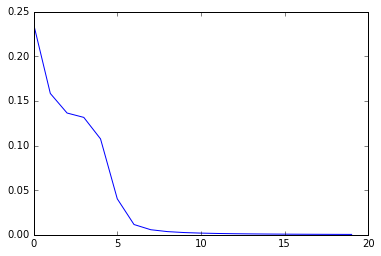

In [12]:
# This script is to validate the results from"Analysis of the Error Surface of the XOR Network with Two Hidden Nodes"
with tf.Graph().as_default():
    batch_size = 1
    input = tf.placeholder(tf.float32, [batch_size, 2])
    target = tf.placeholder(tf.float32, [batch_size, 1])
    hidden_size = 2
    with tf.name_scope("hidden") as scope:
        weights = tf.Variable(tf.truncated_normal([2,2]), tf.float32, name="weights")
        biases = tf.Variable(tf.zeros([2]), tf.float32, name="biases")
        hidden = tf.sigmoid(tf.matmul(input, weights) + biases)  # cell = tf.nn.rnn_cell.BasicRNNCell(hidden_size)
    with tf.name_scope("linear") as scope:
        weights = tf.Variable(tf.zeros([2,1]), name="weights") # actually [2, batch_size]
        biases = tf.Variable(tf.zeros([batch_size]), name="biases")
        output = tf.nn.sigmoid(tf.matmul(hidden, weights) + biases)
    loss = tf.squeeze(tf.square(output - target))
    lr = 0.1
    # train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)
    train_op = tf.train.AdamOptimizer(lr).minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        n = 100 # training examples
        inputs, targets = generateXORData(n)
        max_epoch = 20
        cost_list = []
        for epoch in range(max_epoch):
            total_cost = 0
            for x,y in zip(inputs, targets):
                feed_dict = {input: x, target: y}
                _, cost = sess.run([train_op, loss], feed_dict=feed_dict)
                #print(cost)
                total_cost += cost
            
            print("Epoch: %d: loss: %f" % (epoch, total_cost / n))
            cost_list.append(total_cost / n)
        %matplotlib inline
        plt_out = plt.plot(range(max_epoch), cost_list)
        for var in tf.trainable_variables():
            print(var.name)
            print(var.eval())
            #sess.run()

## Reading List:
- Search: xor problem local minima
- Visualization of the search space of MLP using PCA (This might be also useful for LearnToLearn: http://staff.itee.uq.edu.au/marcusg/gallagher_phd.pdf) 
- Local Minima and Plateaus in Multilayer Neural Networks (looks very very solid) http://www.ism.ac.jp/~fukumizu/papers/icann99.pdf
- 3-D xor problem https://web.stanford.edu/group/pdplab/pdphandbook/handbookch6.html
- http://stackoverflow.com/questions/33997823/tensorflow-mlp-not-training-xor
- Analysis of the Error Surface of the XOR Network with Two Hidden Nodes http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.55.2545&rep=rep1&type=pdf
- 488 Solutions to the XOR Problem https://papers.nips.cc/paper/1298-488-solutions-to-the-xor-problem.pdf
- The Error Surface of the simplest XOR Network has only global Minima http://www.socsci.ru.nl/idak/publications/papers/NeuralComputation.pdf
- Learning XOR: exploring the space of a classic problem http://www.cs.stir.ac.uk/research/publications/techreps/pdf/TR148.pdf

Next, let's try with the sum problem. The training examples are 

In [ ]:
with tf.Graph().as_default():
    